In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.externals import joblib

%matplotlib inline

### Import model and files

In [2]:
## define what's needed for model to load

from sklearn.base import BaseEstimator, TransformerMixin

class FeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column    
    def fit(self, X, y=None):
        return self 
    def transform(self, X, y=None):
        return X[self.column].values

In [3]:
# load up the 
filename = 'logreg_team.pkl'
pipeline = pickle.load(open(filename, 'rb'))

In [5]:
## import files needed
model_df = pd.read_csv('./data/model_df.csv')
pred_full = pd.read_csv('./data/pred_full_team.csv')
pred_full.head()

,year,player,listed_pos,age,tm_name,g,gs,mp,per,ts%,...,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,probas
0,1989.0,kareem abdul-jabbar,C,41.0,LAL,74.0,74.0,1695.0,12.9,0.511,...,1.391892,3.121622,4.513514,1.000000,0.513514,1.148649,1.283784,2.648649,10.108108,0.000613
1,1989.0,mark acres,C,26.0,BOS,62.0,0.0,632.0,8.2,0.507,...,0.951613,1.403226,2.354839,0.306452,0.306452,0.096774,0.370968,1.516129,2.209677,0.000001
2,1989.0,michael adams,PG,26.0,DEN,77.0,77.0,2787.0,17.5,0.567,...,0.922078,2.753247,3.675325,6.363636,2.155844,0.142857,2.337662,1.935065,18.493506,0.048652
3,1989.0,mark aguirre,SF,29.0,TOT,80.0,76.0,2597.0,16.4,0.524,...,1.825000,3.000000,4.825000,3.475000,0.562500,0.450000,2.600000,2.862500,18.887500,0.006872
4,1989.0,danny ainge,PG,29.0,TOT,73.0,54.0,2377.0,18.0,0.554,...,0.972603,2.520548,3.493151,5.506849,1.273973,0.109589,1.986301,2.547945,17.547945,0.011307


### Need to re-do the predicted dataframe for the whole dataset now
- Have the workflow from previous notebook

In [7]:
pred_names = pd.DataFrame()

for year in pred_full['year'].unique():
    for pos in model_df.award_pos.unique():
        
        maskyear = year
        maskpos = pos

        mask = (pred_full['award_pos'] == maskpos) & (pred_full['year'] == maskyear)
        
        
        ## control flow:
        if maskpos != 'C':
        
            pred_names = pred_names.append(pred_full.loc[mask, ['year', 'player', 'probas', 'target']].sort_values(by='probas', ascending=False).head(6))
                    
        else:
            pred_names = pred_names.append(pred_full.loc[mask, ['year', 'player', 'probas', 'target']].sort_values(by='probas', ascending=False).head(3))

        
pred_names = pred_names.reset_index(drop=True)

## comment
pred_award_pos = [1, 2, 3, 1, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3] * pred_names.year.nunique()
pred_names['pred_award_tm'] = pred_award_pos


## comment
pred_names['year-player'] = pred_names['year'].astype(str) + pred_names['player']
pred_names['predicted'] = 1

pred_names = pd.merge(pred_names, model_df[['year-player', 'award_pos']], how='left', on='year-player')

pred_names.head(15)

,year,player,probas,target,pred_award_tm,year-player,predicted,award_pos
0,1989.0,hakeem olajuwon,0.975067,1,1,1989.0hakeem olajuwon,1,C
1,1989.0,patrick ewing,0.859462,1,2,1989.0patrick ewing,1,C
2,1989.0,moses malone,0.676630,0,3,1989.0moses malone,1,C
3,1989.0,michael jordan,0.999865,1,1,1989.0michael jordan,1,G
4,1989.0,magic johnson,0.997596,1,1,1989.0magic johnson,1,G
5,1989.0,clyde drexler,0.924740,0,2,1989.0clyde drexler,1,G
6,1989.0,john stockton,0.913468,1,2,1989.0john stockton,1,G
7,1989.0,kevin johnson,0.879945,1,3,1989.0kevin johnson,1,G
8,1989.0,mark price,0.602931,1,3,1989.0mark price,1,G
9,1989.0,karl malone,0.991978,1,1,1989.0karl malone,1,F


In [9]:
## save it!
# pred_names.to_csv('./data/pred_names_FINAL_team.csv', index=False)
pred_names = pd.read_csv('./data/pred_names_FINAL_team.csv')

Yippee!! Now we have a full prediction set. Time to re-append to `pred_full` to do analysis, and also to keep!

In [10]:
pred_full[(pred_full['year'] == 2000) & (pred_full['target'] > 0)].head()

,year,player,listed_pos,age,tm_name,g,gs,mp,per,ts%,...,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,probas
2858,2000.0,kobe bryant,SG,21.0,LAL,66.0,62.0,2524.0,21.7,0.546,...,1.636364,4.666667,6.303030,4.893939,1.606061,0.939394,2.757576,3.333333,22.500000,0.809867
2872,2000.0,vince carter,SF,23.0,TOR,82.0,82.0,3126.0,23.4,0.543,...,1.829268,3.975610,5.804878,3.926829,1.341463,1.121951,2.170732,3.207317,25.695122,0.737982
2919,2000.0,tim duncan,PF,23.0,SAS,74.0,74.0,2875.0,24.8,0.555,...,3.540541,8.864865,12.405405,3.162162,0.891892,2.229730,3.270270,2.837838,23.189189,0.982780
2942,2000.0,kevin garnett,PF,23.0,MIN,81.0,81.0,3243.0,23.6,0.545,...,2.753086,9.049383,11.802469,4.950617,1.481481,1.555556,3.308642,2.530864,22.925926,0.941057
2977,2000.0,grant hill,SF,27.0,DET,74.0,74.0,2776.0,24.5,0.565,...,1.310811,5.310811,6.621622,5.202703,1.391892,0.581081,3.243243,2.567568,25.756757,0.835018


In [11]:
## merge it!
pred_full_merge = pd.merge(pred_full, pred_names[['year-player', 'predicted', 'pred_award_tm']], 
         how='left', on='year-player').fillna(0)

In [12]:
pred_full_merge[(pred_full_merge['year'] == 2000) & (pred_full_merge['target'] > 0)].head()

,year,player,listed_pos,age,tm_name,g,gs,mp,per,ts%,...,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,probas,predicted,pred_award_tm
2858,2000.0,kobe bryant,SG,21.0,LAL,66.0,62.0,2524.0,21.7,0.546,...,6.303030,4.893939,1.606061,0.939394,2.757576,3.333333,22.500000,0.809867,1.0,1.0
2872,2000.0,vince carter,SF,23.0,TOR,82.0,82.0,3126.0,23.4,0.543,...,5.804878,3.926829,1.341463,1.121951,2.170732,3.207317,25.695122,0.737982,1.0,3.0
2919,2000.0,tim duncan,PF,23.0,SAS,74.0,74.0,2875.0,24.8,0.555,...,12.405405,3.162162,0.891892,2.229730,3.270270,2.837838,23.189189,0.982780,1.0,1.0
2942,2000.0,kevin garnett,PF,23.0,MIN,81.0,81.0,3243.0,23.6,0.545,...,11.802469,4.950617,1.481481,1.555556,3.308642,2.530864,22.925926,0.941057,1.0,2.0
2977,2000.0,grant hill,SF,27.0,DET,74.0,74.0,2776.0,24.5,0.565,...,6.621622,5.202703,1.391892,0.581081,3.243243,2.567568,25.756757,0.835018,1.0,3.0


In [14]:
## save it!
# pred_full_merge.to_csv('./data/pred_full_merge_team.csv', index=False)

## bop it
merged_full = pd.read_csv('./data/pred_full_merge_team.csv')

### Onto our analysis!

** Biggest Snubs**  
Needs a "so who got it instead?"

In [15]:
mask = (pred_full_merge['target'] == 0) & (pred_full_merge['predicted'] == 1)

pred_full_merge.loc[mask].sort_values(by='probas', ascending=False).head(8)

,year,player,listed_pos,age,tm_name,g,gs,mp,per,ts%,...,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,probas,predicted,pred_award_tm
8486,2016.0,james harden,SG,26.0,HOU,82.0,82.0,3125.0,25.3,0.598,...,6.109756,7.463415,1.695122,0.621951,4.560976,2.792683,28.975610,0.981718,1.0,2.0
4692,2006.0,kevin garnett,PF,29.0,MIN,76.0,76.0,2957.0,26.8,0.589,...,12.710526,4.052632,1.368421,1.407895,2.368421,2.710526,21.789474,0.945268,1.0,2.0
78,1989.0,clyde drexler,SG,26.0,POR,78.0,78.0,3064.0,23.6,0.555,...,7.884615,5.769231,2.730769,0.692308,3.205128,3.448718,27.217949,0.924740,1.0,2.0
5677,2008.0,allen iverson,SG,32.0,DEN,82.0,82.0,3424.0,20.9,0.567,...,2.963415,7.146341,1.951220,0.146341,2.987805,1.329268,26.390244,0.906462,1.0,2.0
4694,2006.0,pau gasol,PF,25.0,MEM,80.0,80.0,3135.0,22.7,0.555,...,8.912500,4.637500,0.575000,1.912500,2.937500,2.300000,20.350000,0.906065,1.0,3.0
11433,2017.0,karl-anthony towns,C,21.0,MIN,82.0,82.0,3030.0,26.0,0.618,...,12.280488,2.682927,0.695122,1.256098,2.585366,2.939024,25.134146,0.887287,1.0,2.0
9976,2001.0,jerry stackhouse,SG,26.0,DET,80.0,80.0,3215.0,21.8,0.521,...,3.937500,5.125000,1.212500,0.675000,4.075000,2.000000,29.750000,0.859217,1.0,2.0
11266,2017.0,damian lillard,PG,26.0,POR,75.0,75.0,2694.0,24.1,0.586,...,4.906667,5.853333,0.906667,0.266667,2.626667,2.026667,26.986667,0.799333,1.0,3.0


In [16]:
mask = (pred_full_merge['target'] == 0) & (pred_full_merge['predicted'] == 1)

pred_full_merge.loc[mask].sort_values(by='probas', ascending=False).head(8)\
[['year-player', 'per','ws','trb_per_game', 'ast_per_game', 'pts_per_game', 'probas']]

,year-player,per,ws,trb_per_game,ast_per_game,pts_per_game,probas
8486,2016.0james harden,25.3,13.3,6.109756,7.463415,28.975610,0.981718
4692,2006.0kevin garnett,26.8,14.9,12.710526,4.052632,21.789474,0.945268
78,1989.0clyde drexler,23.6,12.6,7.884615,5.769231,27.217949,0.924740
5677,2008.0allen iverson,20.9,11.6,2.963415,7.146341,26.390244,0.906462
4694,2006.0pau gasol,22.7,12.0,8.912500,4.637500,20.350000,0.906065
11433,2017.0karl-anthony towns,26.0,12.7,12.280488,2.682927,25.134146,0.887287
9976,2001.0jerry stackhouse,21.8,9.2,3.937500,5.125000,29.750000,0.859217
11266,2017.0damian lillard,24.1,10.3,4.906667,5.853333,26.986667,0.799333


In [18]:
mask = (pred_full_merge['target'] == 1) & (pred_full_merge['year'] == 2016) & (pred_full_merge['award_pos'] == 'G')

pred_full_merge.loc[mask].sort_values(by='probas', ascending=False).head(15)\
[['target','year-player', 'ws','trb_per_game', 'ast_per_game', 'pts_per_game', 'award_pos','probas']]

,target,year-player,ws,trb_per_game,ast_per_game,pts_per_game,award_pos,probas
8414,1,2016.0stephen curry,17.9,5.443038,6.670886,30.063291,G,0.999822
8761,1,2016.0russell westbrook,14.0,7.825000,10.425000,23.475000,G,0.995011
8657,1,2016.0chris paul,12.7,4.189189,9.972973,19.540541,G,0.877513
8582,1,2016.0kyle lowry,11.6,4.740260,6.415584,21.220779,G,0.692387
8575,1,2016.0damian lillard,9.2,4.026667,6.826667,25.053333,G,0.634755
8734,1,2016.0klay thompson,8.0,3.825000,2.075000,22.137500,G,0.355011


In [19]:
mask = (pred_full_merge['year'] == 2016)

pred_full_merge.loc[mask].sort_values(by='ws', ascending=False).head(8)\
[['year-player', 'per','ws','trb_per_game', 'ast_per_game', 'pts_per_game', 'probas']]

,year-player,per,ws,trb_per_game,ast_per_game,pts_per_game,probas
8414,2016.0stephen curry,31.5,17.9,5.443038,6.670886,30.063291,0.999822
8435,2016.0kevin durant,28.2,14.5,8.180556,5.013889,28.180556,0.996562
8761,2016.0russell westbrook,27.6,14.0,7.825000,10.425000,23.475000,0.995011
8572,2016.0kawhi leonard,26.0,13.7,6.847222,2.583333,21.152778,0.910926
8530,2016.0lebron james,27.5,13.6,7.434211,6.763158,25.263158,0.993710
8486,2016.0james harden,25.3,13.3,6.109756,7.463415,28.975610,0.981718
8657,2016.0chris paul,26.2,12.7,4.189189,9.972973,19.540541,0.877513
8582,2016.0kyle lowry,22.2,11.6,4.740260,6.415584,21.220779,0.692387


** Biggest "Cupcakes" **  
Needs a "so who should've gotten it?"

In [22]:
mask = (pred_full_merge['target'] == 1) & (pred_full_merge['predicted'] == 0)

pred_full_merge.loc[mask].sort_values(by='probas', ascending=True).head(8)

,year,player,listed_pos,age,tm_name,g,gs,mp,per,ts%,...,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,probas,predicted,pred_award_tm
1826,1995.0,dennis rodman,PF,33.0,SAS,49.0,26.0,1568.0,16.6,0.604,...,16.795918,1.979592,0.632653,0.469388,2.000000,3.244898,7.122449,0.008787,0.0,0.0
1421,1994.0,mitch richmond,SG,28.0,SAC,78.0,78.0,2897.0,17.7,0.551,...,3.666667,4.012821,1.320513,0.217949,2.769231,2.705128,23.371795,0.030692,0.0,0.0
9882,2001.0,dikembe mutombo,C,34.0,TOT,75.0,75.0,2591.0,17.5,0.547,...,13.533333,1.013333,0.386667,2.706667,1.920000,2.720000,9.986667,0.033866,0.0,0.0
7226,2012.0,rajon rondo,PG,25.0,BOS,53.0,53.0,1957.0,17.5,0.483,...,4.849057,11.698113,1.792453,0.056604,3.641509,1.867925,11.886792,0.044697,0.0,0.0
6934,2012.0,tyson chandler,C,29.0,NYK,62.0,62.0,2061.0,18.7,0.708,...,9.870968,0.903226,0.903226,1.435484,1.645161,3.000000,11.274194,0.047467,0.0,0.0
3528,2002.0,dikembe mutombo,C,35.0,PHI,80.0,80.0,2907.0,16.0,0.574,...,10.787500,1.037500,0.362500,2.375000,1.950000,3.025000,11.500000,0.050459,0.0,0.0
1398,1994.0,gary payton,PG,25.0,OKC,82.0,82.0,2881.0,17.8,0.526,...,3.280488,6.024390,2.292683,0.231707,2.109756,2.768293,16.451220,0.051572,0.0,0.0
11758,1993.0,drazen petrovic,SG,28.0,BRK,70.0,67.0,2660.0,17.3,0.605,...,2.714286,3.528571,1.342857,0.185714,2.914286,3.385714,22.342857,0.051889,0.0,0.0


In [23]:
mask = (pred_full_merge['target'] == 1) & (pred_full_merge['predicted'] == 0)

pred_full_merge.loc[mask].sort_values(by='probas', ascending=True).head(8)\
[['year-player', 'ws','trb_per_game', 'ast_per_game', 'pts_per_game', 'probas']]

,year-player,ws,trb_per_game,ast_per_game,pts_per_game,probas
1826,1995.0dennis rodman,5.8,16.795918,1.979592,7.122449,0.008787
1421,1994.0mitch richmond,6.4,3.666667,4.012821,23.371795,0.030692
9882,2001.0dikembe mutombo,8.1,13.533333,1.013333,9.986667,0.033866
7226,2012.0rajon rondo,4.9,4.849057,11.698113,11.886792,0.044697
6934,2012.0tyson chandler,9.5,9.870968,0.903226,11.274194,0.047467
3528,2002.0dikembe mutombo,9.6,10.787500,1.037500,11.500000,0.050459
1398,1994.0gary payton,9.3,3.280488,6.024390,16.451220,0.051572
11758,1993.0drazen petrovic,8.4,2.714286,3.528571,22.342857,0.051889


In [28]:
mask = (pred_full_merge['year'] == 1995) & (pred_full_merge['award_pos'] == 'F')

pred_full_merge.loc[mask].sort_values(by='probas', ascending=False).head(12)\
[['target','year-player', 'ws','trb_per_game', 'ast_per_game', 'pts_per_game', 'probas']]

,target,year-player,ws,trb_per_game,ast_per_game,pts_per_game,probas
1738,1,1995.0karl malone,13.8,10.621951,3.475610,26.670732,0.990716
1537,1,1995.0charles barkley,10.6,11.117647,4.058824,22.955882,0.869879
1804,1,1995.0scottie pippen,11.8,8.088608,5.177215,21.417722,0.794987
1705,1,1995.0shawn kemp,10.6,10.890244,1.817073,18.658537,0.274337
1840,1,1995.0detlef schrempf,12.9,6.195122,3.780488,19.170732,0.246207
1822,0,1995.0clifford robinson,8.7,5.640000,2.640000,21.346667,0.150507
1584,0,1995.0derrick coleman,5.1,10.553571,3.339286,20.464286,0.073465
1717,0,1995.0toni kukoc,10.0,5.432099,4.592593,15.691358,0.071841
1698,0,1995.0larry johnson,8.5,7.222222,4.555556,18.827160,0.068401
1892,0,1995.0chris webber,4.0,9.592593,4.740741,20.092593,0.065101


**Mr. Unlucky**  
Needs a "is there a year he should've made it?"

In [29]:
mask = (pred_full_merge['target'] == 0)

pred_full_merge.loc[mask, ['player', 'year', 'pts_per_game', 'probas', 'predicted','pred_award_tm']]\
.sort_values(by='probas', ascending=False).head(100).groupby('player').agg("count")\
.sort_values(by='year', ascending=False).head(8)

,year,pts_per_game,probas,predicted,pred_award_tm
player,,,,,
alonzo mourning,4,4,4,4,4
vince carter,3,3,3,3,3
carmelo anthony,3,3,3,3,3
shawn marion,3,3,3,3,3
patrick ewing,3,3,3,3,3
larry nance,3,3,3,3,3
elton brand,3,3,3,3,3
demarcus cousins,2,2,2,2,2


In [30]:
mask = (pred_full_merge['target'] == 0)

pred_full_merge.loc[mask, ['player', 'year', 'pts_per_game', 'probas', 'predicted','pred_award_tm']]\
.sort_values(by='probas', ascending=False).head(100).groupby('player').agg("sum")\
.sort_values(by='probas', ascending=False).head(8)

,year,pts_per_game,probas,predicted,pred_award_tm
player,,,,,
patrick ewing,5985.0,70.930879,2.490013,0.0,0.0
alonzo mourning,7982.0,85.821861,2.430306,0.0,0.0
vince carter,6018.0,73.927282,2.119830,2.0,5.0
carmelo anthony,6033.0,78.701299,1.620696,1.0,3.0
elton brand,6014.0,58.712191,1.536753,1.0,3.0
larry nance,5974.0,50.689416,1.436415,2.0,6.0
shawn marion,6011.0,56.051799,1.420471,1.0,3.0
damian lillard,4032.0,47.962276,1.336252,2.0,6.0


In [32]:
## checking out Zo
mask = (pred_full_merge['target'] == 0) & (pred_full_merge['player'] == 'alonzo mourning')

pred_full_merge.loc[mask].sort_values(by='probas', ascending=False).head(3)

,year,player,listed_pos,age,tm_name,g,gs,mp,per,ts%,...,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,probas,predicted,pred_award_tm
9431,1996.0,alonzo mourning,C,25.0,MIA,70.0,70.0,2671.0,22.7,0.584,...,10.385714,2.271429,1.000000,2.700000,3.742857,3.500000,23.185714,0.839438,0.0,0.0
2189,1997.0,alonzo mourning,C,26.0,MIA,66.0,65.0,2320.0,21.6,0.578,...,9.939394,1.575758,0.848485,2.863636,3.424242,4.121212,19.848485,0.660963,0.0,0.0
1769,1995.0,alonzo mourning,C,24.0,CHA,77.0,77.0,2941.0,20.1,0.593,...,9.883117,1.441558,0.636364,2.922078,3.129870,3.571429,21.337662,0.545531,0.0,0.0


In [144]:
## checking out Patrick Ewing
mask = (pred_full_merge['target'] == 0) & (pred_full_merge['player'] == 'patrick ewing')

pred_full_merge.loc[mask].sort_values(by='probas', ascending=False).head(3)

,target,year-player,player,award_tm,listed_pos,age,g,gs,mp,per,...,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,probas,year,award_pos,predicted,pred_award_tm
1235,0,1994.0patrick ewing,patrick ewing,0,C,31.0,79.0,79.0,2972.0,22.9,...,1.139241,2.746835,3.291139,3.481013,24.544304,0.991980,1994.0,0,0.0,0.0
1633,0,1995.0patrick ewing,patrick ewing,0,C,32.0,79.0,79.0,2920.0,21.9,...,0.860759,2.012658,3.240506,3.443038,23.873418,0.805291,1995.0,0,0.0,0.0
9243,0,1996.0patrick ewing,patrick ewing,0,C,33.0,76.0,76.0,2783.0,20.9,...,0.894737,2.421053,2.907895,3.250000,22.513158,0.420006,1996.0,0,0.0,0.0


In [145]:
## checking out Vince Carter
mask = (pred_full_merge['target'] == 0) & (pred_full_merge['player'] == 'vince carter')

pred_full_merge.loc[mask].sort_values(by='probas', ascending=False).head(3)

,target,year-player,player,award_tm,listed_pos,age,g,gs,mp,per,...,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,probas,year,award_pos,predicted,pred_award_tm
4626,0,2006.0vince carter,vince carter,0,SG,29.0,79.0,79.0,2906.0,21.6,...,1.189873,0.670886,2.696203,2.974684,24.189873,0.796590,2006.0,0,0.0,0.0
5085,0,2007.0vince carter,vince carter,0,SG,30.0,82.0,82.0,3126.0,21.8,...,1.000000,0.365854,2.646341,3.243902,25.243902,0.674559,2007.0,G,1.0,3.0
10065,0,2005.0vince carter,vince carter,0,SG,28.0,77.0,76.0,2828.0,22.9,...,1.415584,0.623377,2.181818,3.155844,24.493506,0.598791,2005.0,G,1.0,3.0


### Let's look at Patrick Ewing
- 3 years he just missed... 1994-1995-1996
- Why?

In [151]:
## checking out Patrick Ewing
mask = (pred_full_merge['year'] == 1994) & (pred_full_merge['listed_pos'] == 'C')

pred_full_merge.loc[mask].sort_values(by='probas', ascending=False).head(6)

,target,year-player,player,award_tm,listed_pos,age,g,gs,mp,per,...,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,probas,year,award_pos,predicted,pred_award_tm
1386,1,1994.0shaquille o'neal,shaquille o'neal,3,C,21.0,81.0,81.0,3224.0,28.5,...,0.938272,2.851852,2.740741,3.469136,29.345679,0.999990,1994.0,C,1.0,1.0
1427,1,1994.0david robinson,david robinson,2,C,28.0,80.0,80.0,3241.0,30.7,...,1.737500,3.312500,3.162500,2.850000,29.787500,0.999984,1994.0,C,1.0,2.0
1389,1,1994.0hakeem olajuwon,hakeem olajuwon,1,C,31.0,80.0,80.0,3277.0,25.3,...,1.600000,3.712500,3.387500,3.612500,27.300000,0.999393,1994.0,C,1.0,3.0
1235,0,1994.0patrick ewing,patrick ewing,0,C,31.0,79.0,79.0,2972.0,22.9,...,1.139241,2.746835,3.291139,3.481013,24.544304,0.991980,1994.0,0,0.0,0.0
1484,0,1994.0chris webber,chris webber,0,C,20.0,76.0,76.0,2438.0,21.7,...,1.223684,2.157895,2.710526,3.250000,17.539474,0.286361,1994.0,0,0.0,0.0
1373,0,1994.0alonzo mourning,alonzo mourning,0,C,23.0,60.0,59.0,2018.0,21.7,...,0.450000,3.133333,3.316667,3.450000,21.450000,0.147987,1994.0,0,0.0,0.0


In [152]:
## checking out Patrick Ewing
mask = (pred_full_merge['year'] == 1995) & (pred_full_merge['listed_pos'] == 'C')

pred_full_merge.loc[mask].sort_values(by='probas', ascending=False).head(6)

,target,year-player,player,award_tm,listed_pos,age,g,gs,mp,per,...,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,probas,year,award_pos,predicted,pred_award_tm
1781,1,1995.0shaquille o'neal,shaquille o'neal,2,C,22.0,79.0,79.0,2923.0,28.6,...,0.924051,2.430380,2.582278,3.265823,29.303797,0.999968,1995.0,C,1.0,1.0
1823,1,1995.0david robinson,david robinson,1,C,29.0,81.0,81.0,3074.0,29.1,...,1.654321,3.234568,2.876543,2.839506,27.629630,0.999592,1995.0,C,1.0,2.0
1783,1,1995.0hakeem olajuwon,hakeem olajuwon,3,C,32.0,72.0,72.0,2853.0,26.0,...,1.847222,3.361111,3.291667,3.472222,27.847222,0.986909,1995.0,C,1.0,3.0
1633,0,1995.0patrick ewing,patrick ewing,0,C,32.0,79.0,79.0,2920.0,21.9,...,0.860759,2.012658,3.240506,3.443038,23.873418,0.805291,1995.0,0,0.0,0.0
1769,0,1995.0alonzo mourning,alonzo mourning,0,C,24.0,77.0,77.0,2941.0,20.1,...,0.636364,2.922078,3.129870,3.571429,21.337662,0.589745,1995.0,0,0.0,0.0
1857,0,1995.0rik smits,rik smits,0,C,28.0,78.0,78.0,2381.0,19.5,...,0.512821,1.012821,2.423077,3.564103,17.948718,0.045790,1995.0,0,0.0,0.0


In [33]:
## checking out Patrick Ewing
mask = (pred_full_merge['year'] == 1996) & (pred_full_merge['listed_pos'] == 'C')

pred_full_merge.loc[mask].sort_values(by='probas', ascending=False).head(6)

,year,player,listed_pos,age,tm_name,g,gs,mp,per,ts%,...,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,probas,predicted,pred_award_tm
9494,1996.0,david robinson,C,30.0,SAS,82.0,82.0,3019.0,29.4,0.589,...,12.195122,3.012195,1.353659,3.304878,2.317073,3.195122,25.012195,0.999589,1.0,1.0
9447,1996.0,hakeem olajuwon,C,33.0,HOU,72.0,72.0,2797.0,25.5,0.558,...,10.888889,3.569444,1.569444,2.875000,3.430556,3.361111,26.888889,0.978432,1.0,2.0
9444,1996.0,shaquille o'neal,C,23.0,ORL,54.0,52.0,1946.0,26.4,0.570,...,11.037037,2.870370,0.629630,2.129630,2.870370,3.574074,26.555556,0.957874,1.0,3.0
9431,1996.0,alonzo mourning,C,25.0,MIA,70.0,70.0,2671.0,22.7,0.584,...,10.385714,2.271429,1.000000,2.700000,3.742857,3.500000,23.185714,0.839438,0.0,0.0
9293,1996.0,patrick ewing,C,33.0,NYK,76.0,76.0,2783.0,20.9,0.516,...,10.605263,2.105263,0.894737,2.421053,2.907895,3.250000,22.513158,0.584544,0.0,0.0
9509,1996.0,arvydas sabonis,C,31.0,POR,73.0,21.0,1735.0,24.7,0.617,...,8.054795,1.780822,0.876712,1.068493,2.109589,2.890411,14.493151,0.040580,0.0,0.0


In [34]:
mask = (pred_full_merge['year'].isin([1994, 1995, 1996])) & (pred_full_merge['player'] == 'patrick ewing')
        
pred_full_merge.loc[mask].sort_values(by='probas', ascending=True).head(8)\
        [['year-player', 'per','ws','trb_per_game', 'ast_per_game', 'pts_per_game', 'probas']].describe()

,per,ws,trb_per_game,ast_per_game,pts_per_game,probas
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000
mean,21.9,9.833333,10.927493,2.351543,23.643626,0.830004
std,1.0,3.156475,0.301418,0.298518,1.034887,0.215850
min,20.9,6.800000,10.605263,2.105263,22.513158,0.584544
25%,21.4,8.200000,10.789973,2.185543,23.193288,0.749911
50%,21.9,9.600000,10.974684,2.265823,23.873418,0.915278
75%,22.4,11.350000,11.088608,2.474684,24.208861,0.952735
max,22.9,13.100000,11.202532,2.683544,24.544304,0.990191


# **Takeaways**
- No wonder! He played in an era of some of the GOAT centers: The Admiral, Shaq, and the Dream.
- There are only 3 spots, so during those years he lost out to very deserving players (unlucky)


### Let's look at Vince Carter
- 3 years he just missed... 2005-2006-2007
- Why?

In [35]:
## checking out Vince Carter
mask = (pred_full_merge['year'] == 2005) & (pred_full_merge['listed_pos'].isin(['PG', 'SG']))

pred_full_merge.loc[mask].sort_values(by='probas', ascending=False).head(8)

,year,player,listed_pos,age,tm_name,g,gs,mp,per,ts%,...,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,probas,predicted,pred_award_tm
10251,2005.0,allen iverson,PG,29.0,PHI,75.0,75.0,3174.0,23.2,0.532,...,3.986667,7.946667,2.400000,0.120000,4.586667,1.866667,30.693333,0.954833,1.0,1.0
10481,2005.0,dwyane wade,SG,23.0,MIA,77.0,77.0,2974.0,23.1,0.561,...,5.155844,6.753247,1.571429,1.064935,4.168831,2.987013,24.077922,0.921555,1.0,1.0
10119,2005.0,vince carter,SG,28.0,TOT,77.0,76.0,2828.0,22.9,0.541,...,5.207792,4.246753,1.415584,0.623377,2.181818,3.155844,24.493506,0.690485,1.0,2.0
10104,2005.0,kobe bryant,SG,26.0,LAL,66.0,66.0,2689.0,23.3,0.563,...,5.939394,6.030303,1.303030,0.803030,4.090909,2.636364,27.560606,0.652201,1.0,2.0
10054,2005.0,gilbert arenas,PG,23.0,WAS,80.0,80.0,3274.0,21.3,0.565,...,4.725000,5.137500,1.737500,0.287500,3.025000,3.062500,25.475000,0.616872,1.0,3.0
10350,2005.0,steve nash,PG,30.0,PHO,75.0,75.0,2573.0,22.0,0.606,...,3.320000,11.480000,0.986667,0.080000,3.266667,1.813333,15.533333,0.586908,1.0,3.0
10310,2005.0,stephon marbury,PG,27.0,NYK,82.0,82.0,3281.0,21.9,0.575,...,3.024390,8.146341,1.487805,0.073171,2.841463,2.268293,21.719512,0.397187,0.0,0.0
10045,2005.0,ray allen,SG,29.0,OKC,78.0,78.0,3064.0,20.9,0.555,...,4.448718,3.705128,1.076923,0.064103,2.192308,2.141026,23.935897,0.385486,0.0,0.0


In [36]:
## checking out Vince Carter
mask = (pred_full_merge['year'] == 2006) & (pred_full_merge['listed_pos'].isin(['PG', 'SG']))

pred_full_merge.loc[mask].sort_values(by='probas', ascending=False).head(8)

,year,player,listed_pos,age,tm_name,g,gs,mp,per,ts%,...,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,probas,predicted,pred_award_tm
4610,2006.0,kobe bryant,SG,27.0,LAL,80.0,80.0,3277.0,28.0,0.559,...,5.312500,4.500000,1.837500,0.375000,3.125000,2.912500,35.400000,0.998571,1.0,1.0
4970,2006.0,dwyane wade,SG,24.0,MIA,75.0,75.0,2892.0,27.6,0.577,...,5.733333,6.706667,1.946667,0.773333,3.573333,2.893333,27.200000,0.990733,1.0,1.0
4748,2006.0,allen iverson,PG,30.0,PHI,72.0,72.0,3103.0,25.9,0.543,...,3.222222,7.388889,1.944444,0.138889,3.444444,1.680556,33.013889,0.980808,1.0,2.0
4565,2006.0,gilbert arenas,PG,24.0,WAS,80.0,80.0,3384.0,23.8,0.581,...,3.500000,6.050000,2.012500,0.312500,3.712500,3.575000,29.325000,0.935832,1.0,2.0
4590,2006.0,chauncey billups,PG,29.0,DET,81.0,81.0,2925.0,23.4,0.602,...,3.111111,8.629630,0.876543,0.098765,2.098765,1.975309,18.456790,0.922117,1.0,3.0
4846,2006.0,steve nash,PG,31.0,PHO,79.0,79.0,2796.0,23.3,0.632,...,4.215190,10.455696,0.772152,0.151899,3.493671,1.518987,18.848101,0.885783,1.0,3.0
4626,2006.0,vince carter,SG,29.0,BRK,79.0,79.0,2906.0,21.6,0.536,...,5.848101,4.278481,1.189873,0.670886,2.696203,2.974684,24.189873,0.724318,0.0,0.0
4870,2006.0,tony parker,PG,23.0,SAS,80.0,80.0,2715.0,20.8,0.584,...,3.262500,5.750000,1.037500,0.050000,3.112500,2.012500,18.875000,0.512998,0.0,0.0


In [37]:
## checking out Vince Carter
mask = (pred_full_merge['year'] == 2007) & (pred_full_merge['listed_pos'].isin(['PG', 'SG']))

pred_full_merge.loc[mask].sort_values(by='probas', ascending=False).head(8)

,year,player,listed_pos,age,tm_name,g,gs,mp,per,ts%,...,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,probas,predicted,pred_award_tm
5072,2007.0,kobe bryant,SG,28.0,LAL,77.0,77.0,3140.0,26.1,0.580,...,5.701299,5.363636,1.441558,0.467532,3.311688,2.662338,31.558442,0.983700,1.0,1.0
5427,2007.0,dwyane wade,SG,25.0,MIA,51.0,50.0,1931.0,28.9,0.583,...,4.686275,7.529412,2.098039,1.215686,4.235294,2.294118,27.392157,0.936620,1.0,1.0
5303,2007.0,steve nash,PG,32.0,PHO,76.0,76.0,2682.0,23.8,0.654,...,3.539474,11.631579,0.750000,0.078947,3.776316,1.539474,18.578947,0.935802,1.0,2.0
5279,2007.0,tracy mcgrady,SG,27.0,HOU,71.0,71.0,2539.0,23.2,0.515,...,5.323944,6.450704,1.295775,0.507042,3.000000,1.915493,24.605634,0.913236,1.0,2.0
5022,2007.0,gilbert arenas,PG,25.0,WAS,74.0,73.0,2942.0,24.0,0.565,...,4.567568,5.986486,1.878378,0.175676,3.189189,3.364865,28.445946,0.760027,1.0,3.0
5085,2007.0,vince carter,SG,30.0,BRK,82.0,82.0,3126.0,21.8,0.559,...,6.000000,4.792683,1.000000,0.365854,2.646341,3.243902,25.243902,0.705027,1.0,3.0
5014,2007.0,ray allen,SG,31.0,OKC,55.0,55.0,2219.0,21.6,0.564,...,4.490909,4.145455,1.490909,0.200000,2.800000,2.054545,26.436364,0.441265,0.0,0.0
5327,2007.0,tony parker,PG,24.0,SAS,77.0,77.0,2499.0,21.4,0.572,...,3.246753,5.454545,1.064935,0.077922,2.480519,1.779221,18.558442,0.413957,0.0,0.0


In [38]:
pred_full_merge.shape

(12331, 78)

## All-NBA shares

In [39]:
award_shares = merged_full.groupby('player').agg('sum').loc[:, ['probas', 'target']]

award_shares['proba_per_select'] = award_shares['probas'] / award_shares['target']
award_shares.sort_values(by='probas', ascending=False).head(25)

,probas,target,proba_per_select
player,,,
tim duncan,13.138593,14,0.938471
karl malone,13.001336,12,1.083445
lebron james,12.968475,13,0.997575
kobe bryant,12.550552,14,0.896468
shaquille o'neal,12.480597,13,0.960046
dirk nowitzki,10.042319,12,0.836860
david robinson,9.565886,10,0.956589
kevin garnett,9.023849,8,1.127981
hakeem olajuwon,8.462131,8,1.057766


In [40]:
award_shares.loc[award_shares['target'] ==1]\
.sort_values(by='proba_per_select', ascending=False).head(25)

,probas,target,proba_per_select
player,,,
alonzo mourning,4.083839,1,4.083839
elton brand,2.904773,1,2.904773
chris bosh,2.716694,1,2.716694
brad daugherty,2.602071,1,2.602071
carlos boozer,1.804608,1,1.804608
derrick rose,1.713728,1,1.713728
kyle lowry,1.656394,1,1.656394
john wall,1.632794,1,1.632794
rod strickland,1.495332,1,1.495332


In [41]:
award_shares['missed'] = award_shares['proba_per_select'].map(lambda x: np.round(x))\
- award_shares['target']

In [42]:
## most "missed"
award_shares.loc[award_shares['target'] ==1]\
.sort_values(by='missed', ascending=False).head(10)

,probas,target,proba_per_select,missed
player,,,,
alonzo mourning,4.083839,1,4.083839,3.0
chris bosh,2.716694,1,2.716694,2.0
elton brand,2.904773,1,2.904773,2.0
brad daugherty,2.602071,1,2.602071,2.0
john wall,1.632794,1,1.632794,1.0
kyle lowry,1.656394,1,1.656394,1.0
carlos boozer,1.804608,1,1.804608,1.0
derrick rose,1.713728,1,1.713728,1.0
larry johnson,1.133930,1,1.133930,0.0


In [43]:
## most "stolen"
award_shares.loc[award_shares['target'] ==1]\
.sort_values(by='missed', ascending=True).head(10)

,probas,target,proba_per_select,missed
player,,,,
metta world peace,0.208860,1,0.208860,-1.0
tyson chandler,0.217016,1,0.217016,-1.0
goran dragic,0.441423,1,0.441423,-1.0
andre drummond,0.335420,1,0.335420,-1.0
andrew bogut,0.199458,1,0.199458,-1.0
juwan howard,0.143438,1,0.143438,-1.0
eddie jones,0.378881,1,0.378881,-1.0
bernard king,0.280036,1,0.280036,-1.0
rajon rondo,0.466945,1,0.466945,-1.0


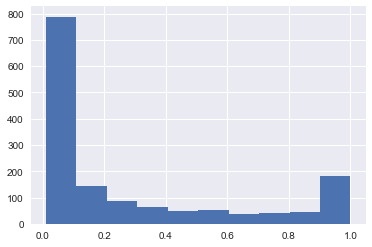

In [44]:
plt.hist(merged_full.loc[(merged_full['probas'] > 0.01), 'probas']);

In [45]:
merged_full.shape

(12331, 78)